[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.5%20cufflinks%20%EB%A1%9C%20QuantFig%20%EA%B7%B8%EB%A6%AC%EA%B8%B0-input.ipynb)


<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png">

이미지 출처 : [Overviews — PyViz 0.0.1 documentation](https://pyviz.org/overviews/index.html)

## pandas의 plot 문법으로 plotly를 사용할 수 있는 cufflinks

* 판다스의 plot 을 iplot으로 변경만 하면 plotly의 동적인 시각화 기능을 사용할 수 있습니다.
* 기본적인 판다스 plot 뿐만 아니라 증권데이터 분석을 위한 **캔들차트, 볼린저밴드, MACD, RSI** 지표를 그려볼 수도 있습니다.
* plotly 의 Financial Charts 에 비해 기술적 분석 지표를 따로 계산하지 않고 코드 한 두 줄로 그려볼 수 있다는 장점이 있습니다.
* [santosjorge/cufflinks: Productivity Tools for Plotly + Pandas](https://github.com/santosjorge/cufflinks)
* <font color="red">⚠️주의사항⚠️ : 다양한 라이브러리의 추상화된 고수준 인터페이스를 제공하기 있기 때문에 환경에 따라 라이브러리 버전간의 충돌이나 오류가 발생할 수 있습니다.</font> 

## 라이브러리 로드

In [1]:
!pip install cufflinks

In [2]:
# 데이터 분석을 위한 pandas
# pandas로 plotly 시각화를 할 수 있는 cufflinks 로드하기
import pandas as pd
import cufflinks as cf

In [3]:
# 그래프가 주피터 노트북에서 표시되지 않는다면 아래 설정을 사용해 주세요.
cf.go_offline()

In [4]:
# 강의에서 사용하는 버전보다 낮은 버전을 사용하면 동작하지 않을 수도 있습니다.
cf.__version__

'0.17.3'

## cufflinks 내장 데이터 불러오기

In [5]:
df = cf.datagen.ohlcv()
df.shape

(100, 5)

## pandas를 통한 OHLC 데이터 시각화 하기

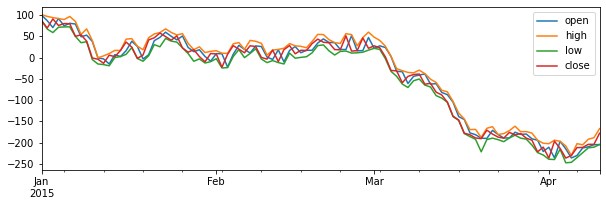

In [6]:
# "open", "high", "low", "close"
df[["open", "high", "low", "close"]].plot(figsize=(10,3))

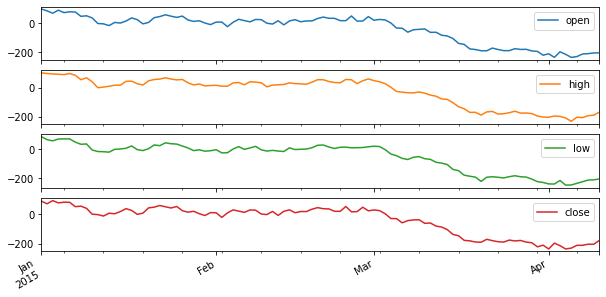

In [7]:
# subplots 그리기
f = df[["open", "high", "low", "close"]].plot(figsize=(10, 5), subplots=True)

## cufflinks 를 통한 plotly 쉽게 사용하기

In [8]:
# pandas의 plot을 iplot으로 바꾸면 plotly로 시각화 합니다.
df[["open", "high", "low", "close"]].iplot()

In [9]:
# pandas의 plot을 iplot으로 바꾸면 plotly로 시각화 합니다.
df[["open", "high", "low", "close"]].iplot(subplots=True)

## cufflinks 의 QuantFig 사용하기
* QuantFig 를 사용하면 캔들차드와 보조 지표 몇 가지를 쉽게 그려볼 수 있습니다.

In [10]:
qf = cf.QuantFig(df, name="캔들차트")
# qf

In [11]:
# qf.iplot() 으로 시각화 합니다.
qf.iplot()

## QuantFig 로 볼린저 밴드 그리기

[santosjorge/cufflinks: Productivity Tools for Plotly + Pandas](https://github.com/santosjorge/cufflinks)

In [12]:
# add_bollinger_bands 로 볼린저 밴드를 추가합니다.
qf.add_bollinger_bands()

In [13]:
# qf.iplot() 으로 그래프를 보여줍니다.
qf.iplot()

In [14]:
# QuantFig 를 통해 이동평균, 볼린저밴드, RSI, 거래량, MACD 값을 그립니다
qf = cf.QuantFig(df, name="캔들차트")
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_macd()
qf.add_volume()
qf.iplot()

## 특정 주가를 가져와서 시각화 하기

In [15]:
# FinanceDataReader 로 테슬라: TSLA 주가 가져오기
!pip install -U finance-datareader
import FinanceDataReader as fdr

tsla = fdr.DataReader("TSLA", "2020", "2021")
tsla.shape

(253, 6)

In [16]:
tsla.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,86.05,84.90,86.14,84.34,47790000.0,0.0284
2020-01-03,88.60,88.10,90.80,87.38,88970000.0,0.0296
2020-01-06,90.31,88.09,90.31,88.00,50790000.0,0.0193
2020-01-07,93.81,92.28,94.33,90.67,91050000.0,0.0388
2020-01-08,98.43,94.74,99.70,93.65,156000000.0,0.0492


In [17]:
# QuantFig 를 통한 테슬라 주가 시각화
qf = cf.QuantFig(tsla, title="테슬라 일별 시세")
qf.add_sma([30, 60], color=["red", "blue"])
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_macd()
qf.add_volume()
qf.iplot()